# **Proyecto 2 - C2**

* Daniel Bernal

### **Caso 1**
Una empresa está interesada en desarrollar un modelo predictivo para estimar el precio de las
viviendas en el estado Iowa en EE.UU. utilizando diversas características de las propiedades. Se dispone de
un conjunto de datos con 2,930 registros que incluyen múltiples atributos de las viviendas. Una
descripción detallada de cada característica puede encontrarse en internet. Su objetivo es construir un modelo
de regresión que permita predecir el precio de viviendas y soporte la toma de decisiones relacionada
con las inversiones de la compañía. Como parte del proceso usted deberá realizar:

### **Paso 1.** Limpieza de los datos:
- Verifique si es necesario realizar algún tipo de corrección de formato.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/ames.csv', index_col=0)
df.head()

,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,Reg,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,IR1,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,IR1,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [ ]:
pd.set_option('display.max_columns', 81)

# Visualiza las primeras filas
print(df.head())

             PID  area   price  MS.SubClass MS.Zoning  Lot.Frontage  Lot.Area  \
Order                                                                           
1      526301100  1656  215000           20        RL         141.0     31770   
2      526350040   896  105000           20        RH          80.0     11622   
3      526351010  1329  172000           20        RL          81.0     14267   
4      526353030  2110  244000           20        RL          93.0     11160   
5      527105010  1629  189900           60        RL          74.0     13830   

      Street Alley Lot.Shape Land.Contour Utilities Lot.Config Land.Slope  \
Order                                                                       
1       Pave   NaN       IR1          Lvl    AllPub     Corner        Gtl   
2       Pave   NaN       Reg          Lvl    AllPub     Inside        Gtl   
3       Pave   NaN       IR1          Lvl    AllPub     Corner        Gtl   
4       Pave   NaN       Reg          Lvl    Al

In [ ]:
#Street se cambia a variable binaria y Central.Air
for column in df.columns:
    print(f"Valores únicos de la columna '{column}':")
    print(df[column].unique()[:4])  # Muestra solo los primeros 10 valores únicos
    print("\n")

Valores únicos de la columna 'PID':
[526301100 526350040 526351010 526353030]


Valores únicos de la columna 'area':
[1656  896 1329 2110]


Valores únicos de la columna 'price':
[215000 105000 172000 244000]


Valores únicos de la columna 'MS.SubClass':
[ 20  60 120  50]


Valores únicos de la columna 'MS.Zoning':
['RL' 'RH' 'FV' 'RM']


Valores únicos de la columna 'Lot.Frontage':
[141.  80.  81.  93.]


Valores únicos de la columna 'Lot.Area':
[31770 11622 14267 11160]


Valores únicos de la columna 'Street':
['Pave' 'Grvl']


Valores únicos de la columna 'Alley':
[nan 'Pave' 'Grvl']


Valores únicos de la columna 'Lot.Shape':
['IR1' 'Reg' 'IR2' 'IR3']


Valores únicos de la columna 'Land.Contour':
['Lvl' 'HLS' 'Bnk' 'Low']


Valores únicos de la columna 'Utilities':
['AllPub' 'NoSewr' 'NoSeWa']


Valores únicos de la columna 'Lot.Config':
['Corner' 'Inside' 'CulDSac' 'FR2']


Valores únicos de la columna 'Land.Slope':
['Gtl' 'Mod' 'Sev']


Valores únicos de la columna 'Neighborhood

In [ ]:
df['House.Style'].unique()

array(['1Story', '2Story', '1.5Fin', 'SFoyer', 'SLvl', '2.5Unf', '1.5Unf',
       '2.5Fin'], dtype=object)

In [ ]:
#Se binarizan variables
df['Street'] = df['Street'].map({'Pave': 1, 'Grvl': 0})
df['Central.Air'] = df['Central.Air'].map({'Y': 1, 'N': 0})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2930 entries, 1 to 2930
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   area             2930 non-null   int64  
 2   price            2930 non-null   int64  
 3   MS.SubClass      2930 non-null   int64  
 4   MS.Zoning        2930 non-null   object 
 5   Lot.Frontage     2440 non-null   float64
 6   Lot.Area         2930 non-null   int64  
 7   Street           2930 non-null   int64  
 8   Alley            198 non-null    object 
 9   Lot.Shape        2930 non-null   object 
 10  Land.Contour     2930 non-null   object 
 11  Utilities        2930 non-null   object 
 12  Lot.Config       2930 non-null   object 
 13  Land.Slope       2930 non-null   object 
 14  Neighborhood     2930 non-null   object 
 15  Condition.1      2930 non-null   object 
 16  Condition.2      2930 non-null   object 
 17  Bldg.Type        29

-  Verificar si existen valores faltantes. En caso de existir determinar cual es la mejor estrategia
según la naturaleza de la columna (No realice ninguna modificación en esta etapa)

In [ ]:
df_missing = df[df.isnull().any(axis=1)]
print(df_missing)

             PID  area   price  MS.SubClass MS.Zoning  Lot.Frontage  Lot.Area  \
Order                                                                           
1      526301100  1656  215000           20        RL         141.0     31770   
2      526350040   896  105000           20        RH          80.0     11622   
3      526351010  1329  172000           20        RL          81.0     14267   
4      526353030  2110  244000           20        RL          93.0     11160   
5      527105010  1629  189900           60        RL          74.0     13830   
...          ...   ...     ...          ...       ...           ...       ...   
2926   923275080  1003  142500           80        RL          37.0      7937   
2927   923276100   902  131000           20        RL           NaN      8885   
2928   923400125   970  132000           85        RL          62.0     10441   
2929   924100070  1389  170000           20        RL          77.0     10010   
2930   924151050  2000  1880

In [ ]:
df = df.drop(['Alley', 'Mas.Vnr.Type','Fireplace.Qu','Pool.QC', 'Fence','Misc.Feature' ], axis=1)

# Mostrar el DataFrame después de eliminar las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2930 entries, 1 to 2930
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   area             2930 non-null   int64  
 2   price            2930 non-null   int64  
 3   MS.SubClass      2930 non-null   int64  
 4   MS.Zoning        2930 non-null   object 
 5   Lot.Frontage     2440 non-null   float64
 6   Lot.Area         2930 non-null   int64  
 7   Street           2930 non-null   int64  
 8   Lot.Shape        2930 non-null   object 
 9   Land.Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot.Config       2930 non-null   object 
 12  Land.Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition.1      2930 non-null   object 
 15  Condition.2      2930 non-null   object 
 16  Bldg.Type        2930 non-null   object 
 17  House.Style      29

-  Generar un conjunto de datos de prueba con el 20% de los datos disponibles.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

#Se mueve a la mitad del inciso C pues se eliminaron mas columnas en el analisis exploratorio

### **Paso 2.**  Análisis exploratorio:
- Realice el análisis descriptivo de las características que considera más importantes.

In [ ]:
from warnings import catch_warnings
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object']).columns
print(num_cols)
print(cat_cols)

num_cols_df = df[num_cols]
cat_cols_df = df[cat_cols]

Index(['PID', 'area', 'price', 'MS.SubClass', 'Lot.Frontage', 'Lot.Area',
       'Street', 'Overall.Qual', 'Overall.Cond', 'Year.Built',
       'Year.Remod.Add', 'Mas.Vnr.Area', 'BsmtFin.SF.1', 'BsmtFin.SF.2',
       'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Central.Air', 'X1st.Flr.SF',
       'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath',
       'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr',
       'TotRms.AbvGrd', 'Fireplaces', 'Garage.Yr.Blt', 'Garage.Cars',
       'Garage.Area', 'Wood.Deck.SF', 'Open.Porch.SF', 'Enclosed.Porch',
       'X3Ssn.Porch', 'Screen.Porch', 'Pool.Area', 'Misc.Val', 'Mo.Sold',
       'Yr.Sold'],
      dtype='object')
Index(['MS.Zoning', 'Lot.Shape', 'Land.Contour', 'Utilities', 'Lot.Config',
       'Land.Slope', 'Neighborhood', 'Condition.1', 'Condition.2', 'Bldg.Type',
       'House.Style', 'Roof.Style', 'Roof.Matl', 'Exterior.1st',
       'Exterior.2nd', 'Exter.Qual', 'Exter.Cond', 'Foundation', 'Bsmt.Qual',
       'Bsmt.Cond', 

In [ ]:
num_cols_df.corr()
price_corr = num_cols_df.corr()['price']
print(price_corr)

PID               -0.246521
area               0.706780
price              1.000000
MS.SubClass       -0.085092
Lot.Frontage       0.357318
Lot.Area           0.266549
Street             0.059519
Overall.Qual       0.799262
Overall.Cond      -0.101697
Year.Built         0.558426
Year.Remod.Add     0.532974
Mas.Vnr.Area       0.508285
BsmtFin.SF.1       0.432914
BsmtFin.SF.2       0.005891
Bsmt.Unf.SF        0.182855
Total.Bsmt.SF      0.632280
Central.Air        0.264506
X1st.Flr.SF        0.621676
X2nd.Flr.SF        0.269373
Low.Qual.Fin.SF   -0.037660
Bsmt.Full.Bath     0.276050
Bsmt.Half.Bath    -0.035835
Full.Bath          0.545604
Half.Bath          0.285056
Bedroom.AbvGr      0.143913
Kitchen.AbvGr     -0.119814
TotRms.AbvGrd      0.495474
Fireplaces         0.474558
Garage.Yr.Blt      0.526965
Garage.Cars        0.647877
Garage.Area        0.640401
Wood.Deck.SF       0.327143
Open.Porch.SF      0.312951
Enclosed.Porch    -0.128787
X3Ssn.Porch        0.032225
Screen.Porch       0

In [ ]:
from sklearn.feature_selection import chi2

chix = cat_cols_df.apply(lambda x: pd.factorize(x)[0]).corrwith(df['price'])
print(chix)

MS.Zoning        -0.280896
Lot.Shape        -0.193006
Land.Contour      0.020730
Utilities        -0.026032
Lot.Config        0.054595
Land.Slope        0.066396
Neighborhood     -0.082866
Condition.1      -0.058268
Condition.2       0.014752
Bldg.Type        -0.162800
House.Style      -0.097065
Roof.Style       -0.200138
Roof.Matl         0.063571
Exterior.1st     -0.269007
Exterior.2nd     -0.212843
Exter.Qual        0.560112
Exter.Cond       -0.116858
Foundation       -0.016889
Bsmt.Qual         0.482193
Bsmt.Cond        -0.034614
Bsmt.Exposure     0.051392
BsmtFin.Type.1    0.166426
BsmtFin.Type.2    0.005912
Heating          -0.089147
Heating.QC        0.199995
Electrical       -0.232150
Kitchen.Qual      0.489285
Functional       -0.124775
Garage.Type      -0.294050
Garage.Finish    -0.006633
Garage.Qual       0.061683
Garage.Cond       0.016035
Paved.Drive      -0.183566
Sale.Type         0.008130
Sale.Condition   -0.040397
dtype: float64


**Numericas:**

**Características numéricas con mayor correlación positiva:**

- Overall.Qual (0.799): La calidad general de la construcción tiene la correlación más alta con el precio, lo que significa que a mayor calidad, mayor será el precio de la vivienda.

- area (0.706): El área de la vivienda también está fuertemente correlacionada con el precio, lo que sugiere que el tamaño es un factor clave.

- Garage.Cars (0.647): El número de autos que caben en el garaje está relacionado con el precio, indicando que viviendas con mayor capacidad de garaje son más valiosas.

- Total.Bsmt.SF (0.632): El área total del sótano es otra característica importante.

- X1st.Flr.SF (0.621): El área del primer piso también tiene un impacto considerable en el precio.

**Características numericas con correlación negativa:**

- Overall.Cond (-0.101): La condición general del inmueble tiene una leve correlación negativa con el precio, lo que indica que, aunque no es muy fuerte, las propiedades en peor condición pueden tener precios más bajos.

- PID (-0.246): El identificador de la parcela (PID) tiene una correlación negativa moderada, pero como es un identificador, probablemente no tiene una relación significativa con el precio de la vivienda y se debería considerar eliminarlo del análisis.

**Categoricas:**

**Características categóricas con mayor asociación positiva:**

- Exter.Qual (0.560): La calidad de los acabados exteriores tiene la asociación más fuerte con el precio de la vivienda.

- Kitchen.Qual (0.489): La calidad de la cocina es otra característica categórica clave, ya que los compradores tienden a valorar cocinas de mayor calidad.

- Bsmt.Qual (0.482): La calidad del sótano también juega un papel importante.

**Características categóricas con menor asociación (relativamente insignificantes):**

- Utilities (-0.026): Los servicios públicos no parecen estar muy relacionados con el precio.

- Foundation (-0.016): El tipo de cimentación tampoco parece tener una fuerte relación con el precio.


**Eliminacion de variables:**

Overall.Cond (-0.101): Correlación negativa leve, no parece ser un predictor relevante.

PID (-0.246): Un identificador que generalmente no tiene significado predictivo.

Utilities (-0.026): Correlación casi nula.

Foundation (-0.016): Muy poca correlación con la variable objetivo.

BsmtFin.SF.2 (0.005891): Muy poca correlación, casi nula.

Misc.Val (-0.015691): Correlación casi nula.

Yr.Sold (-0.030569): Correlación negativa y muy cercana a 0.

Mo.Sold (0.035259): Correlación muy baja.

Bsmt.Half.Bath (-0.035835): Correlación negativa muy baja.

Low.Qual.Fin.SF (-0.037660): Correlación negativa baja.

Condition.2 (0.014752): Muy poca asociación.

Garage.Finish (-0.006633): Asociación prácticamente nula.

Foundation (-0.016889): Ya mencionada, tiene baja asociación.

Sale.Type (0.008130): Muy poca asociación.

Garage.Cond (0.016035): Muy baja asociación.

Bsmt.Cond (-0.034614): Baja asociación.


In [ ]:
dfiii = df
df.drop(['Overall.Cond','PID', 'Utilities', 'Foundation', 'BsmtFin.SF.2', 'Misc.Val', 'Yr.Sold', 'Mo.Sold', 'Bsmt.Half.Bath',
         'Low.Qual.Fin.SF', 'Condition.2', 'Garage.Finish', 'Foundation', 'Sale.Type', 'Garage.Cond', 'Bsmt.Cond'], axis=1, inplace=True)

-  Generar al menos 5 preguntas que permitan contrastar dos predictores.

**Pregunta 1** ¿Cómo varía el precio de la vivienda según la calidad de construcción (Overall.Qual) y el área (area)?

Tipo de comparación: numérico-numérico

Gráfico: Diagrama de dispersión con una línea de tendencia para visualizar la relación entre ambas variables.

Estadístico: Coeficiente de correlación de Pearson entre Overall.Qual y area para determinar la fuerza de su relación con el precio.

Coeficiente de correlación de Pearson entre Overall.Qual y area: 0.571, p-value: 0.000


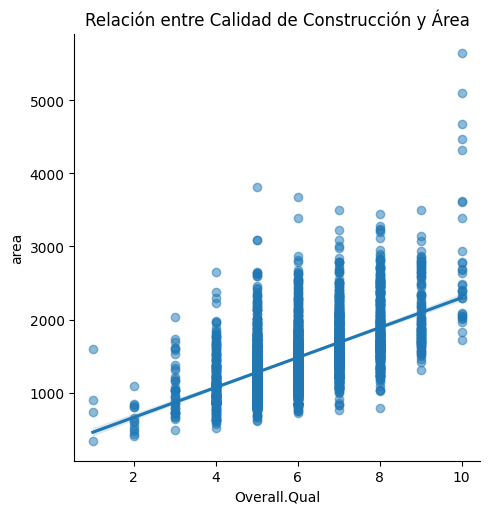

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as ols

# Gráfico de dispersión con línea de tendencia
sns.lmplot(x="Overall.Qual", y="area", data=df, scatter_kws={'alpha':0.5})
plt.title("Relación entre Calidad de Construcción y Área")

# Estadístico: Coeficiente de correlación de Pearson
correlation, p_value = pearsonr(df["Overall.Qual"], df["area"])
print(f"Coeficiente de correlación de Pearson entre Overall.Qual y area: {correlation:.3f}, p-value: {p_value:.3f}")
plt.show()

**Interpretacion de la grafica con los distintos valores estadisticos:**

La gráfica muestra la relación entre la calidad de construcción general (Overall.Qual) y el área (area) de las viviendas. Se observa una tendencia positiva, y los valores estadísticos presentados (coeficiente de correlación de Pearson y p-valor) ayudan a interpretar esta relación.

Análisis:

Relación entre Overall.Qual y area:

La calidad de construcción (Overall.Qual) está en el eje X y el área (area) en el eje Y.
La gráfica muestra una tendencia positiva, indicando que a medida que aumenta la calidad de construcción, el área de la vivienda también tiende a incrementarse.
Esto sugiere que las viviendas de mayor calidad suelen tener áreas más grandes.
Coeficiente de correlación de Pearson:

Valor del coeficiente de correlación: 0.571
Este valor indica una correlación positiva moderada entre la calidad de construcción y el área. Un valor de 0.571 implica que hay una relación directa, aunque no perfecta, entre ambas variables: a mayor calidad de construcción, suele haber un aumento en el área.
Significancia estadística (p-valor):

Valor p: 0.000
Un p-valor tan bajo sugiere que la relación observada es altamente significativa y no es producto del azar. En otras palabras, hay evidencia sólida para afirmar que la calidad de construcción y el área están relacionadas.

Conclusión:

La calidad de construcción tiene una influencia positiva y significativa sobre el área de la vivienda. Aunque no es una correlación extremadamente alta, el valor de 0.571, combinado con el p-valor muy bajo, indica una asociación moderada entre ambas variables: en general, a mejor calidad de construcción, mayor área de la vivienda.

**Pregunta 2** ¿Cuál es la diferencia en el precio promedio de viviendas con distintos niveles de calidad exterior (Exter.Qual) y calidad de cocina (Kitchen.Qual)?

Tipo de comparación: categórico-categórico
Gráfico: Gráfico de caja y bigotes (boxplot) para mostrar la distribución del precio en función de las combinaciones de calidad exterior y calidad de cocina.
Estadístico: ANOVA de dos factores para evaluar si existen diferencias significativas en el precio promedio entre los niveles de calidad.

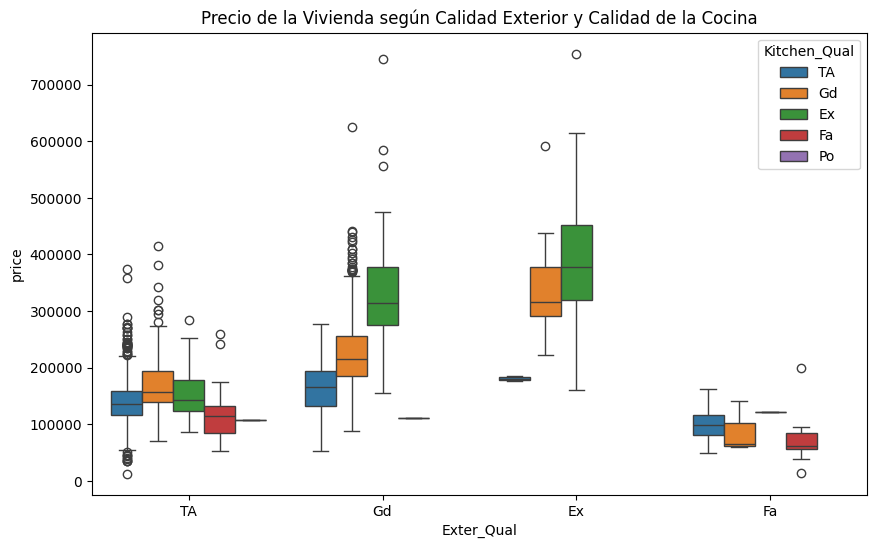

ANOVA de dos factores:
                                      sum_sq      df           F        PR(>F)
C(Exter_Qual)                  1.785292e+12     3.0  227.594830  1.416555e-49
C(Kitchen_Qual)                6.949822e+10     4.0    6.644893  1.805864e-04
C(Exter_Qual):C(Kitchen_Qual)  1.313918e+12    12.0   41.875621  5.224789e-78
Residual                       7.619303e+12  2914.0         NaN           NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 10
  warnings.warn('covariance of constraints does not have full '


In [ ]:
# Importar librerías necesarias
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

dfii = df

dfii.rename(columns={'Exter.Qual': 'Exter_Qual', 'Kitchen.Qual': 'Kitchen_Qual'}, inplace=True)
model = smf.ols('price ~ C(Exter_Qual) * C(Kitchen_Qual)', data=dfii).fit()

# Gráfico de caja y bigotes (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x="Exter_Qual", y="price", hue="Kitchen_Qual", data=dfii)
plt.title("Precio de la Vivienda según Calidad Exterior y Calidad de la Cocina")
plt.show()

# Estadístico: ANOVA de dos factores
# Usamos acentos graves en los nombres de las columnas para evitar conflictos
model = smf.ols('price ~ C(Exter_Qual) * C(Kitchen_Qual)', data=dfii).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA de dos factores:\n", anova_table)


**Interpretacion de la grafica con los distintos valores estadisticos:**

La gráfica muestra cómo el precio de las viviendas varía en función de dos factores: la calidad exterior (Exter_Qual) y la calidad de la cocina (Kitchen_Qual). A continuación, se analizan estos resultados junto con los valores estadísticos de una prueba ANOVA de dos factores:


Distribución del Precio según Calidad Exterior y de Cocina:

La calidad exterior (Exter_Qual) está representada en el eje X con niveles TA, Gd, Ex, y Fa.
Dentro de cada grupo de calidad exterior, los diferentes colores indican la calidad de la cocina (Kitchen_Qual), con niveles TA, Gd, Ex, Fa, y Po.
Se observa que los precios tienden a aumentar a medida que mejoran tanto la calidad exterior como la calidad de la cocina. En particular:
Los niveles Ex en calidad exterior y Ex en calidad de cocina están asociados con los precios más altos.
Los precios disminuyen significativamente en las categorías de menor calidad, como TA y Fa.


Análisis Estadístico ANOVA:

Efecto de Exter_Qual:
Suma de cuadrados (sum_sq): 1.785292e+12
Grados de libertad (df): 3
F: 227.594830
Valor p (PR(>F)): 1.416555e-49
Este factor tiene un efecto muy significativo en el precio (valor p extremadamente bajo), lo que indica que la calidad exterior es un factor importante para predecir el precio de la vivienda.
Efecto de Kitchen_Qual:
Suma de cuadrados: 6.949282e+10
df: 4
F: 6.644893
Valor p: 1.885846e-04
Aunque menos significativo que la calidad exterior, la calidad de la cocina también tiene un impacto relevante en el precio (valor p bajo).
Interacción entre Exter_Qual y Kitchen_Qual:
Suma de cuadrados: 1.313910e+12
df: 12
F: 41.875621
Valor p: 5.224789e-78
La interacción entre estos dos factores es altamente significativa, lo que sugiere que el efecto de una variable depende del nivel de la otra. Por ejemplo, una calidad de cocina alta tiene un impacto mayor en el precio si también se cuenta con una calidad exterior alta.


Conclusión:

Tanto la calidad exterior como la de la cocina influyen significativamente en el precio de la vivienda, con una interacción notable entre ambos factores. Una vivienda con alta calidad en ambos aspectos tiende a tener precios considerablemente más altos.

**Pregunta 3** ¿Cómo influye el área del sótano (Total.Bsmt.SF) en el precio en función de la calidad del sótano (Bsmt.Qual)?

Tipo de comparación: numérico-categórico

Gráfico sugerido: Gráfico de dispersión con el área del sótano en el eje X y el precio en el eje Y, coloreado por los niveles de Bsmt.Qual.

Estadístico sugerido: Regresión lineal por nivel de calidad de sótano para evaluar si la relación entre Total.Bsmt.SF y el precio cambia según la calidad del sótano.

Nivel TA: Slope=54.460, Intercept=87827.065, R²=0.156
Nivel Gd: Slope=88.071, Intercept=103071.091, R²=0.334
Nivel Ex: Slope=72.690, Intercept=213553.312, R²=0.143
Nivel nan no tiene datos suficientes para la regresión.
Nivel Fa: Slope=22.061, Intercept=93753.362, R²=0.018
Nivel Po: Slope=-44.262, Intercept=96657.377, R²=1.000


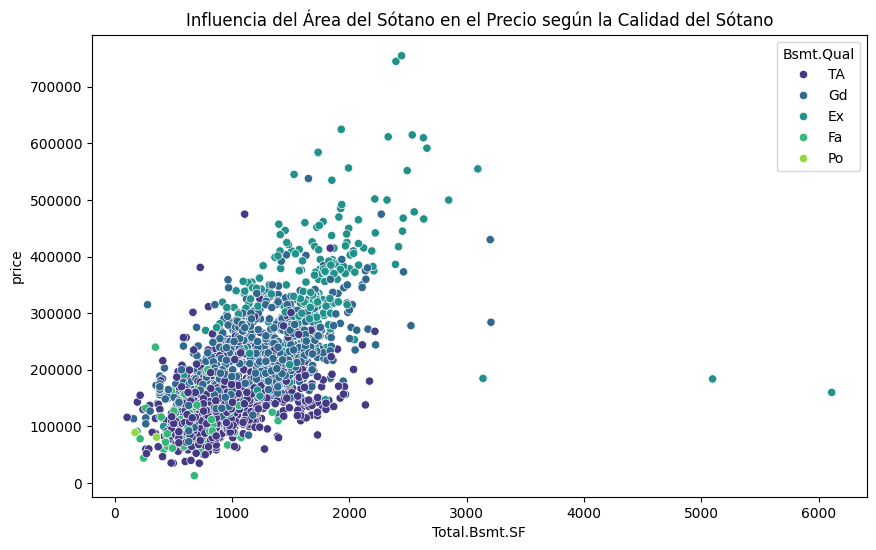

In [ ]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Total.Bsmt.SF", y="price", hue="Bsmt.Qual", palette="viridis", data=df)
plt.title("Influencia del Área del Sótano en el Precio según la Calidad del Sótano")

# Ajuste de regresión lineal por nivel de calidad del sótano
for level in df['Bsmt.Qual'].unique():
    subset = df[df['Bsmt.Qual'] == level]

    # Verifica que el subset tenga datos
    if subset.empty:
        print(f"Nivel {level} no tiene datos suficientes para la regresión.")
        continue

    X = sm.add_constant(subset['Total.Bsmt.SF'])  # Agrega una constante para el intercepto
    model = sm.OLS(subset['price'], X).fit()

    # Extraer pendiente y el intercepto
    intercept, slope = model.params
    r_squared = model.rsquared  # R²

    print(f"Nivel {level}: Slope={slope:.3f}, Intercept={intercept:.3f}, R²={r_squared:.3f}")

plt.show()


**Interpretacion de la grafica con los distintos valores estadisticos:**

La gráfica muestra la relación entre el área total del sótano (Total.Bsmt.SF) y el precio (price) de las propiedades, desglosada según la calidad del sótano (Bsmt.Qual). La gráfica y los valores estadísticos proporcionan algunos puntos clave:

Relación general entre el área del sótano y el precio:

En general, se observa una tendencia positiva entre el área del sótano y el precio de la propiedad, es decir, a medida que el área del sótano aumenta, el precio tiende a incrementarse.
Análisis por calidad del sótano:

Los datos están segmentados por diferentes niveles de calidad del sótano (Bsmt.Qual), cada uno representado con un color distinto.

A continuación, se detallan las observaciones y métricas de cada nivel de calidad:


Nivel TA (Typical/Average):

Pendiente (Slope): 54.460
Intercepto: 87827.065
R² = 0.156
Este nivel muestra una relación positiva moderada con el precio, aunque el R² indica que solo un 15.6% de la variación en el precio puede explicarse por el área del sótano.

Nivel Gd (Good):

Pendiente: 88.071
Intercepto: 103071.891
R² = 0.334
La pendiente más alta entre los niveles comunes indica una relación más fuerte con el precio. El valor de R² es 0.334, lo cual sugiere que el 33.4% de la variabilidad en el precio se explica por el área del sótano.

Nivel Ex (Excellent):

Pendiente: 72.690
Intercepto: 213553.312
R² = 0.143
Aunque tiene una pendiente positiva, el R² es bajo (0.143), lo que indica que solo el 14.3% de la variación en el precio está relacionada con el área del sótano para esta calidad.

Nivel Fa (Fair):

Pendiente: 22.061
Intercepto: 93753.362
R² = 0.018
La pendiente es la más baja (22.061), y el valor de R² es casi nulo (0.018), indicando una relación muy débil entre el área del sótano y el precio.

Nivel Po (Poor):

Pendiente: -44.262
Intercepto: 96657.377
R² = 1.000
Este nivel presenta una pendiente negativa, lo cual es atípico, y un valor de R² de 1.000. Esto podría ser debido a un número de datos muy limitado o a valores atípicos en la muestra para este nivel de calidad.
Conclusión:

La calidad del sótano tiene un impacto en la relación entre el área del sótano y el precio de la propiedad, siendo los niveles de calidad Gd y Ex los que muestran una relación más significativa. El nivel Po, con pendiente negativa y R² perfecto, sugiere posibles datos atípicos o insuficientes.
El área del sótano es un factor relevante para el precio, pero su impacto varía considerablemente según la calidad del sótano.

**Pregunta 4** ¿Cómo varía el precio de la vivienda según el número de autos que caben en el garaje (Garage.Cars) y el área del primer piso (X1st.Flr.SF)?

Tipo de comparación: numérico-numérico

Gráfico sugerido: Gráfico de dispersión en el que el tamaño del punto representa Garage.Cars.

Estadístico sugerido: Análisis de correlación parcial para observar la influencia de cada variable en el precio, controlando la otra variable.

Correlación parcial entre 'X1st.Flr.SF' y 'price' controlando 'Garage.Cars': 0.4924213416511631


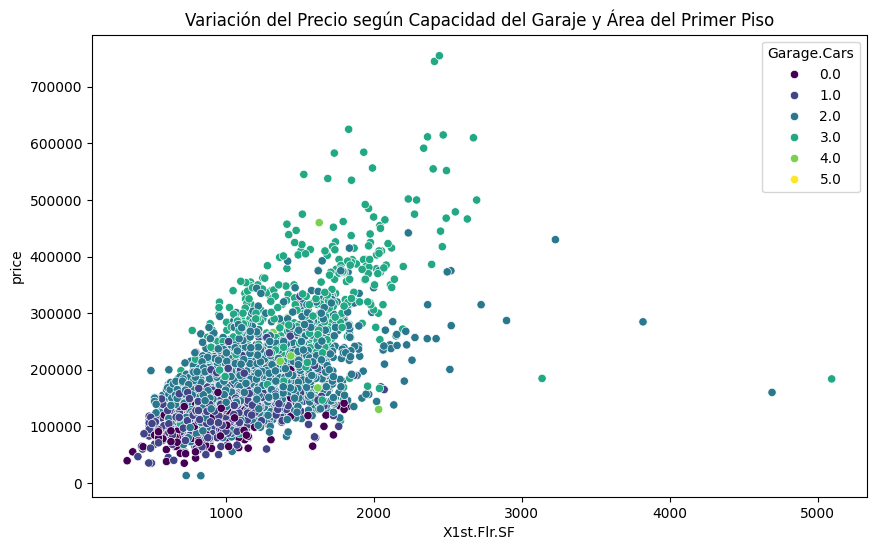

In [ ]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Eliminar filas con NaN o inf en las columnas necesarias
df_clean = df[['X1st.Flr.SF', 'price', 'Garage.Cars']].dropna()

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x="X1st.Flr.SF", y="price", hue="Garage.Cars",palette="viridis", data=df_clean)
plt.title("Variación del Precio según Capacidad del Garaje y Área del Primer Piso")

# Cálculo de correlación parcial sin pingouin
# 1. Residuales de 'X1st.Flr.SF' eliminando efecto de 'Garage.Cars'
X1_resid = sm.OLS(df_clean['X1st.Flr.SF'], sm.add_constant(df_clean['Garage.Cars'])).fit().resid

# 2. Residuales de 'price' eliminando efecto de 'Garage.Cars'
price_resid = sm.OLS(df_clean['price'], sm.add_constant(df_clean['Garage.Cars'])).fit().resid

# 3. Correlación entre los residuales
partial_corr_value = X1_resid.corr(price_resid)
print("Correlación parcial entre 'X1st.Flr.SF' y 'price' controlando 'Garage.Cars':", partial_corr_value)

plt.show()


**Interpretación de la gráfica**

Relación entre Área del Primer Piso y Precio:

Existe una relación positiva entre el área del primer piso y el precio de la propiedad. A medida que aumenta el área del primer piso, el precio también tiende a incrementarse.
La relación es bastante fuerte, como indica la forma ascendente de la nube de puntos.
Capacidad del Garaje:

El tamaño de los puntos refleja la capacidad del garaje, es decir, el número de autos que puede alojar.
Aunque no se observan grupos claramente diferenciados, las propiedades con una capacidad de garaje más grande tienden a tener precios más altos y, generalmente, también tienen un área de primer piso mayor. Esto sugiere que las propiedades más grandes, en términos de espacio, suelen tener tanto un área de primer piso amplia como una mayor capacidad de garaje.

**Interpretación de los resultados:**

Correlación Parcial:

El valor de correlación parcial entre el área del primer piso (X1st.Flr.SF) y el precio (price), controlando por la capacidad del garaje (Garage.Cars), es 0.4924. Esto indica una correlación positiva moderada entre el área del primer piso y el precio, incluso cuando se controla el efecto de la capacidad del garaje.
Este valor de correlación parcial sugiere que, aunque la capacidad del garaje es un factor que podría influir en el precio, el área del primer piso sigue teniendo una influencia significativa en el precio por sí misma.

**Pregunta 5** ¿Existen diferencias significativas en el precio de las viviendas según la condición general (Overall.Cond) y la calidad de los acabados exteriores (Exter.Qual)?

Tipo de comparación: categórico-categórico.

Gráfico sugerido: Gráfico de barras que muestre el precio promedio por cada combinación de Overall.Cond y Exter.Qual.

Estadístico sugerido: Prueba de chi-cuadrado o ANOVA de dos factores para evaluar si la interacción entre la condición y los acabados exteriores influye en el precio.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 5
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 22
  warnings.warn('covariance of constraints does not have full '


ANOVA de dos factores:
                                      sum_sq      df            F  \
C(Overall_Qual)                1.507621e+11     9.0     9.299604   
C(Exter_Qual)                  7.428705e+12     3.0  1374.695606   
C(Overall_Qual):C(Exter_Qual)  1.747783e+12    27.0    35.936715   
Residual                       5.225563e+12  2901.0          NaN   

                                      PR(>F)  
C(Overall_Qual)                 8.452948e-09  
C(Exter_Qual)                   0.000000e+00  
C(Overall_Qual):C(Exter_Qual)  3.712936e-134  
Residual                                 NaN  


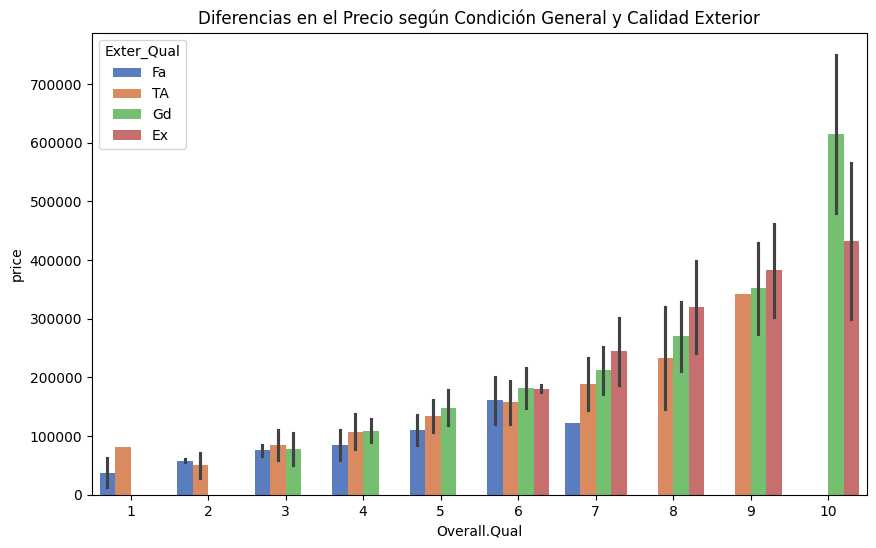

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras con las columnas correctas
plt.figure(figsize=(10, 6))
sns.barplot(x="Overall.Qual", y="price", hue="Exter_Qual", data=dfiii, errorbar="sd", palette="muted")
plt.title("Diferencias en el Precio según Condición General y Calidad Exterior")

dfii_i = df

dfii_i.rename(columns={'Overall.Qual': 'Overall_Qual', 'Exter.Qual': 'Exter_Qual'}, inplace=True)
model = smf.ols('price ~ C(Overall_Qual) * C(Exter_Qual)', data=dfii_i).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA de dos factores:\n", anova_table)

plt.show()

**Interpretación de la gráfica:**

Relación entre Calidad General y Precio: A medida que aumenta la calidad general de la construcción (Overall.Qual), el precio promedio de la propiedad también aumenta. Esto es evidente en el aumento constante de las barras a medida que se avanza de izquierda a derecha en el eje x.

Impacto de la Calidad Exterior: Para cada nivel de calidad general, la calidad exterior también parece influir en el precio:

Las propiedades con una calidad exterior "Excelente" (Ex) y "Buena" (Gd) tienden a tener precios más altos en cada categoría de calidad general.
Las propiedades con una calidad exterior "Regular" (TA) y "Mala" (Fa) suelen tener precios más bajos en comparación con las categorías "Ex" y "Gd".
Interacción entre Calidad General y Exterior: Existe una interacción entre la calidad general y la calidad exterior, ya que el efecto de la calidad exterior parece más fuerte en propiedades de mayor calidad general. Esto sugiere que cuando la calidad general es alta, la calidad exterior juega un papel más significativo en el precio final.

Variabilidad del Precio: Las barras negras indican el error estándar del precio dentro de cada combinación de calidad general y exterior. Esta variabilidad aumenta con el nivel de calidad general, lo cual es común en propiedades de alta gama donde el precio puede fluctuar considerablemente debido a factores adicionales.

**Interpretación de los resultados:**

C(Overall_Qual):

sum_sq: 1.507621e+11. Esto muestra la variación en el precio explicada únicamente por la calidad general de la construcción.
F: 9.299604. Este valor F es relativamente alto, lo que indica que "Overall_Qual" tiene un impacto considerable en el precio.
PR(>F): 8.452948e-09. Este valor p es muy bajo (menor que 0.05), lo cual significa que el efecto de "Overall_Qual" sobre el precio es estadísticamente significativo. Es decir, la calidad general de la construcción tiene un impacto importante en el precio de las propiedades.
C(Exter_Qual):

sum_sq: 7.428705e+12. Esto indica que la calidad exterior tiene una alta variación en relación con el precio, más que "Overall_Qual".
F: 1374.695606. Este es un valor F muy alto, lo que sugiere que "Exter_Qual" es un factor extremadamente significativo en la variación del precio.
PR(>F): 0.000000e+00. El valor p es 0 (redondeado), lo que confirma que el efecto de "Exter_Qual" sobre el precio es altamente significativo.
C(Overall_Qual)
(Exter_Qual) (Interacción entre la calidad general y la calidad exterior):

sum_sq: 1.747783e+12. La interacción entre estos dos factores también explica una cantidad considerable de variación en el precio.
F: 35.936715. Este valor F elevado sugiere que la interacción entre "Overall_Qual" y "Exter_Qual" tiene un efecto significativo sobre el precio.
PR(>F): 3.712936e-134. El valor p extremadamente bajo indica que esta interacción es estadísticamente significativa. Esto significa que el efecto de la calidad exterior en el precio depende del nivel de la calidad general, o viceversa.
Residual:

Esta fila representa la variación no explicada por el modelo (error o ruido en los datos).
sum_sq: 5.225563e+12. Aunque el modelo explica una parte significativa de la variación, aún queda una cantidad considerable de variación no explicada.

In [ ]:
print(dfiii.columns)


Index(['area', 'price', 'MS.SubClass', 'MS.Zoning', 'Lot.Frontage', 'Lot.Area',
       'Street', 'Lot.Shape', 'Land.Contour', 'Lot.Config', 'Land.Slope',
       'Neighborhood', 'Condition.1', 'Bldg.Type', 'House.Style',
       'Overall_Qual', 'Year.Built', 'Year.Remod.Add', 'Roof.Style',
       'Roof.Matl', 'Exterior.1st', 'Exterior.2nd', 'Mas.Vnr.Area',
       'Exter_Qual', 'Exter.Cond', 'Bsmt.Qual', 'Bsmt.Exposure',
       'BsmtFin.Type.1', 'BsmtFin.SF.1', 'BsmtFin.Type.2', 'Bsmt.Unf.SF',
       'Total.Bsmt.SF', 'Heating', 'Heating.QC', 'Central.Air', 'Electrical',
       'X1st.Flr.SF', 'X2nd.Flr.SF', 'Bsmt.Full.Bath', 'Full.Bath',
       'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen_Qual',
       'TotRms.AbvGrd', 'Functional', 'Fireplaces', 'Garage.Type',
       'Garage.Yr.Blt', 'Garage.Cars', 'Garage.Area', 'Garage.Qual',
       'Paved.Drive', 'Wood.Deck.SF', 'Open.Porch.SF', 'Enclosed.Porch',
       'X3Ssn.Porch', 'Screen.Porch', 'Pool.Area', 'Sale.Condition'],
      dty

### **Paso 3.** Transformación de datos:
- Identifique posibles valores a\picos que puedan afectar modelo. Elimine los valores utilizando el
método IQR para las variables numéricas. Verifique que método utilizar para variables ordinales
y nominales.

In [ ]:
def eliminar_outliers_iqr(df, columns):
    for col in columns:
        # Calcular Q1 (percentil 25) y Q3 (percentil 75)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        # Calcular IQR
        IQR = Q3 - Q1
        # Definir límites de los valores atípicos
        lower_bound = Q1 - 5 * IQR
        upper_bound = Q3 + 5 * IQR
        # Filtrar los valores fuera del rango aceptable
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Aplicar a las variables numéricas de tu DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_sin_outl = eliminar_outliers_iqr(df, numeric_columns)
df = df_sin_outl

No se empleo un metodo para averiguar los outliers en las variables categoricas, puesto que, todas las etiquetas tienen sentido por lo que no representa un error de algun tipo dentro del contexto del ejercicio.

In [ ]:
# Dividir los datos en entrenamiento y prueba
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar la forma de los conjuntos de datos
print("Forma del conjunto de entrenamiento:", X_train.shape)
print("Forma del conjunto de prueba:", X_test.shape)

Forma del conjunto de entrenamiento: (1245, 59)
Forma del conjunto de prueba: (312, 59)


-  Generar un pipeline de preprocesamiento que encapsule todas las transformaciones necesarias.

In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object']).columns

num_cols_df = df[num_cols]
cat_cols_df = df[cat_cols]

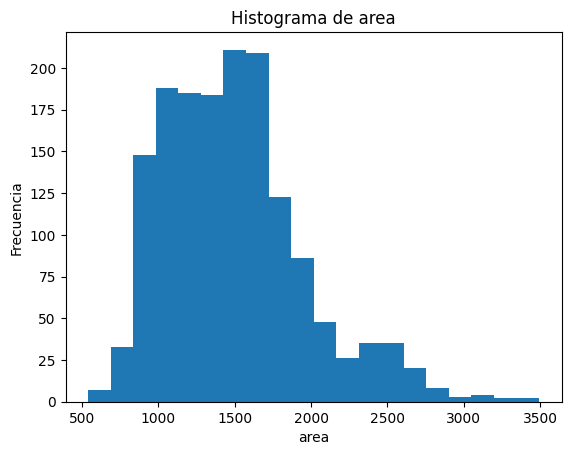

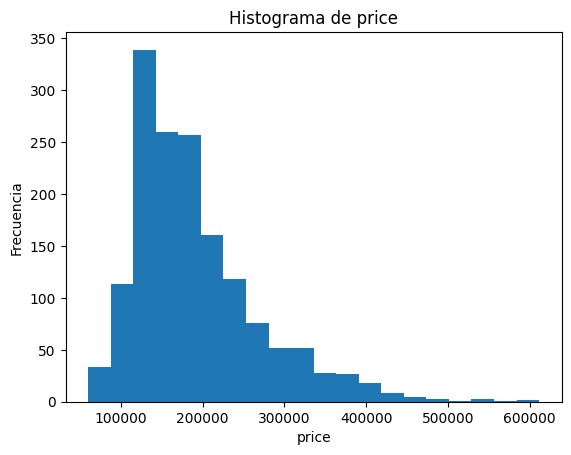

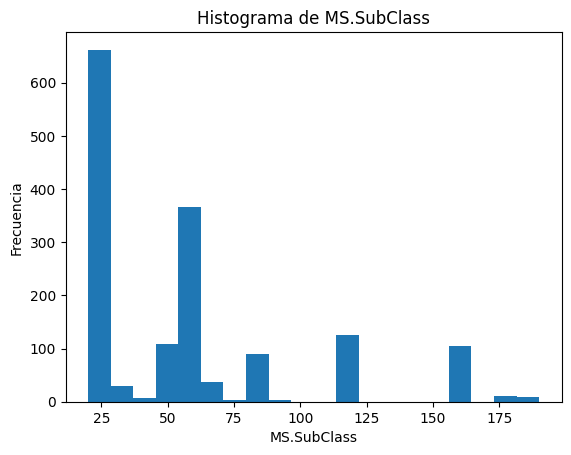

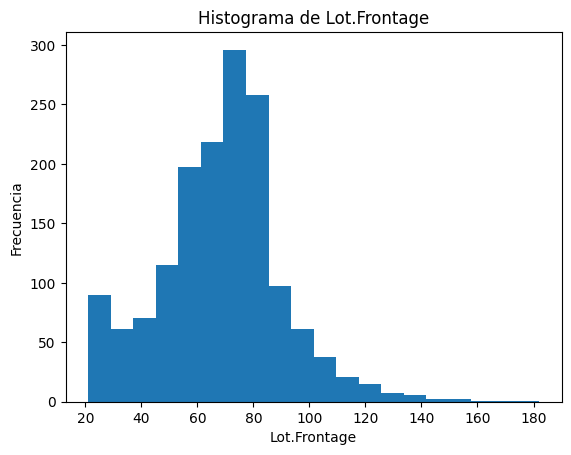

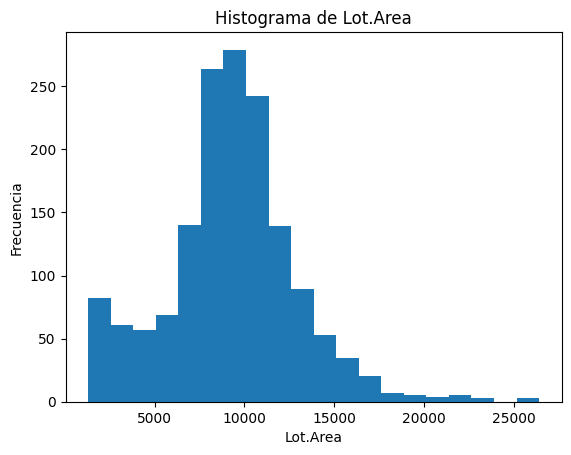

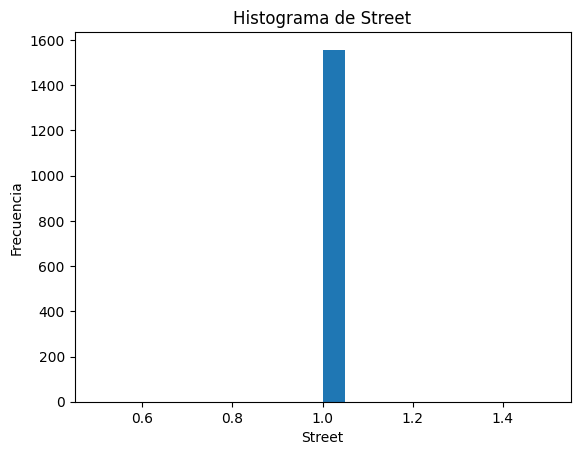

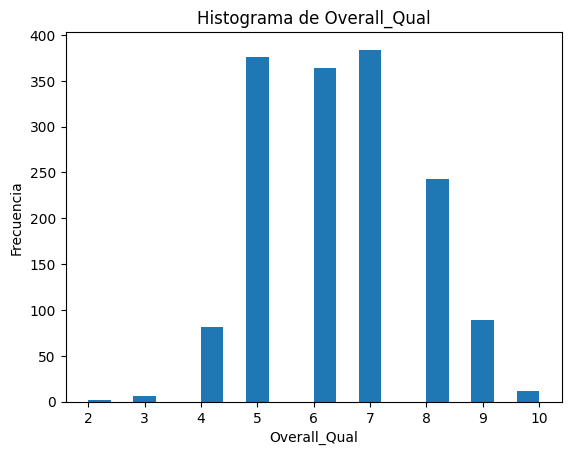

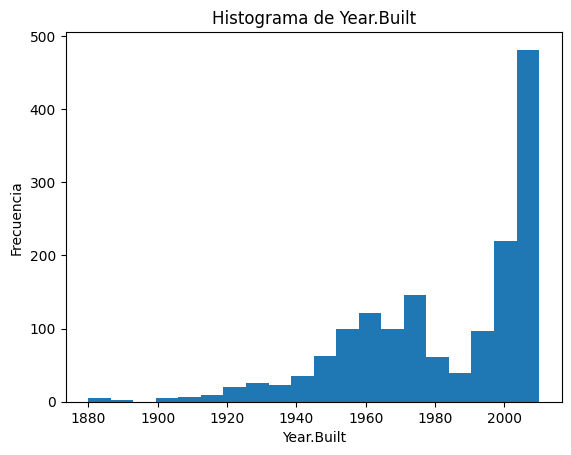

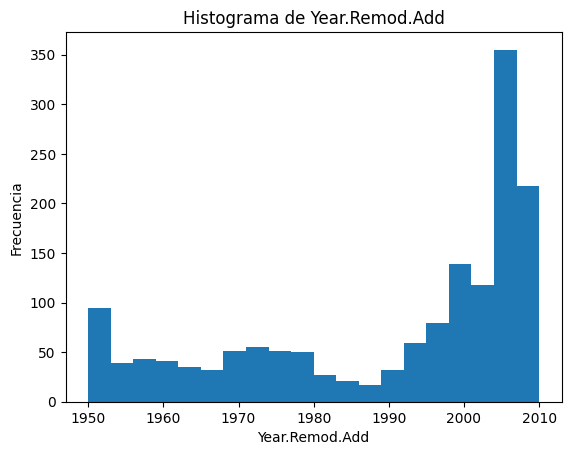

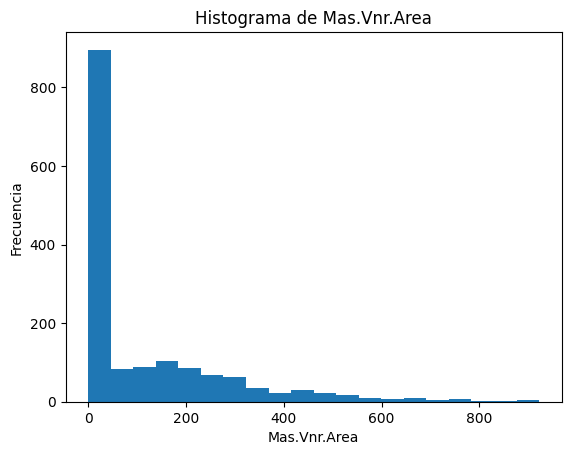

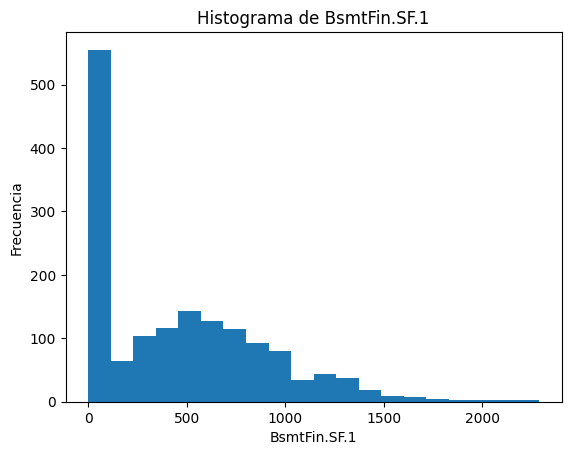

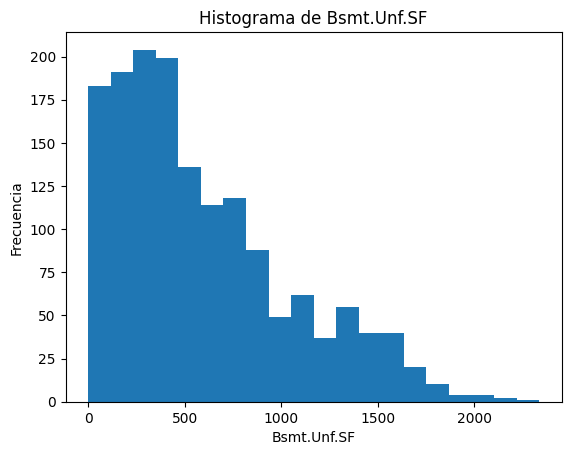

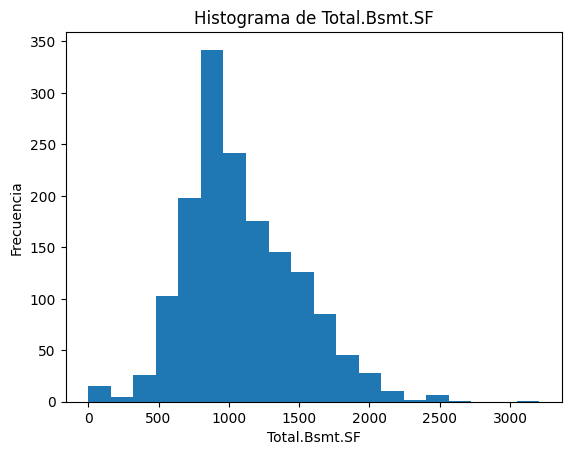

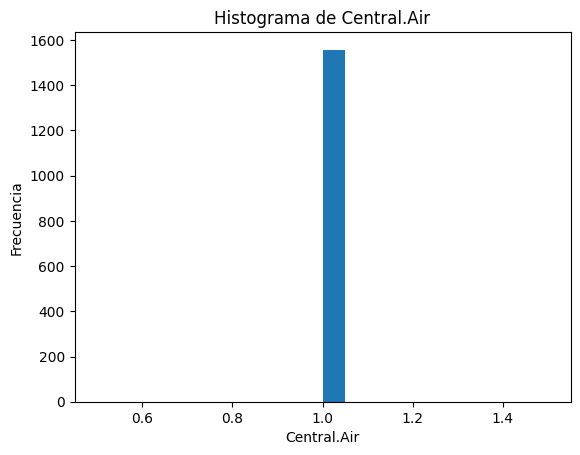

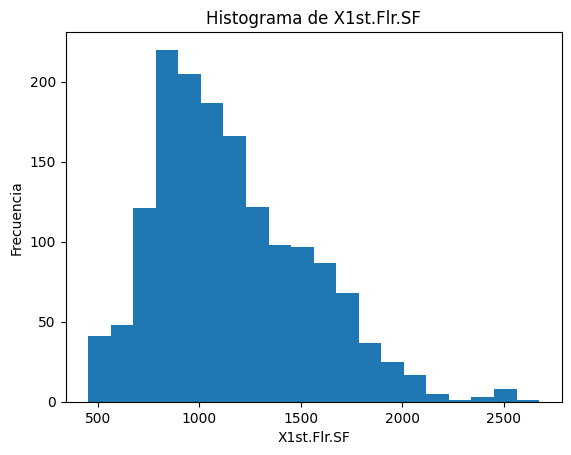

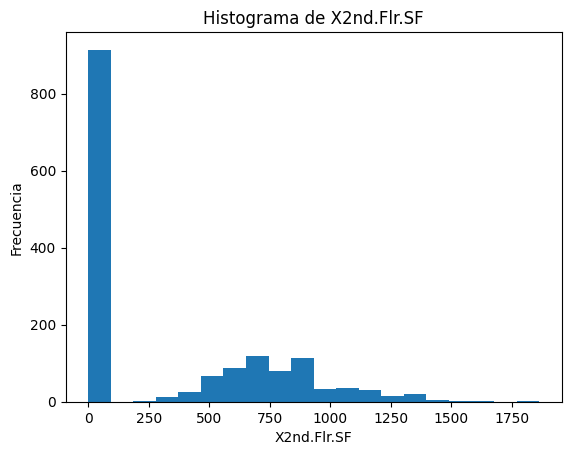

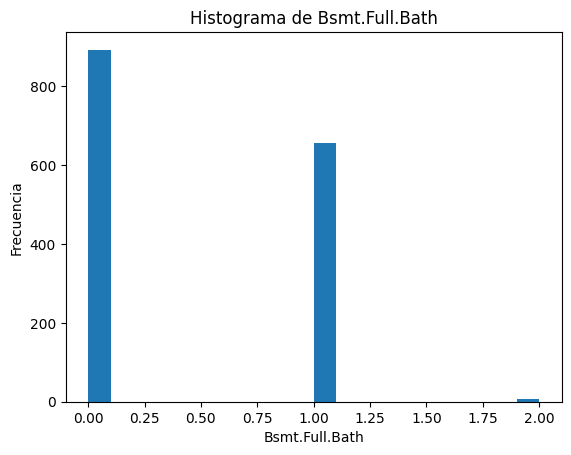

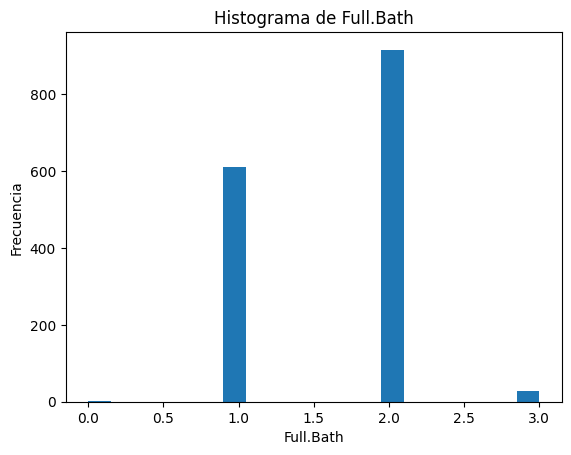

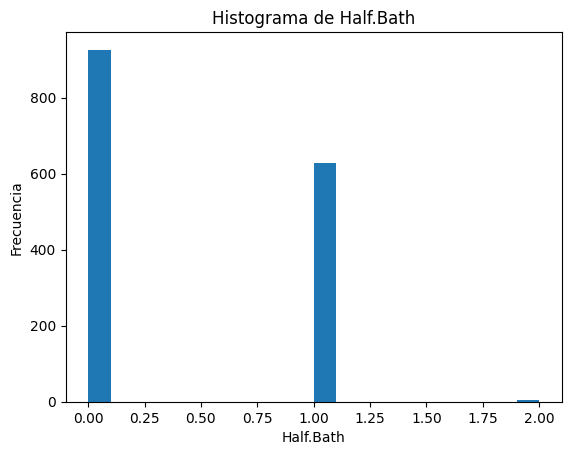

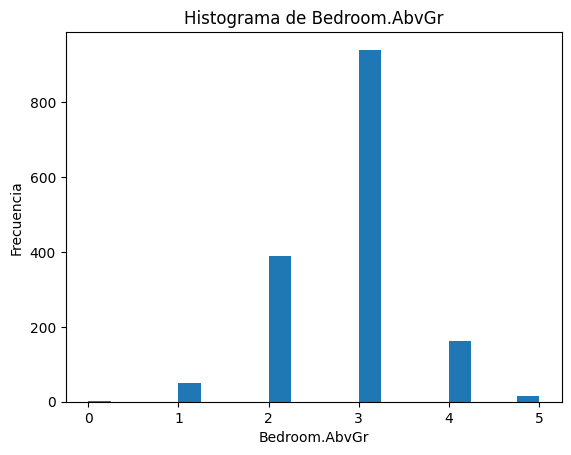

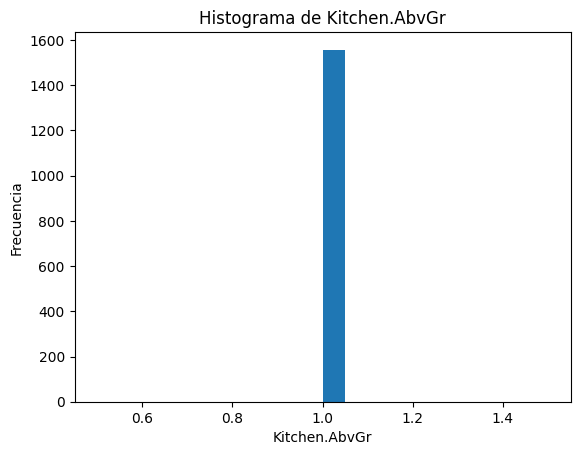

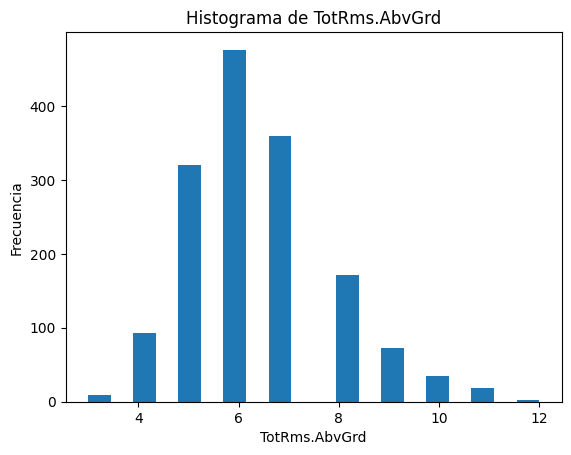

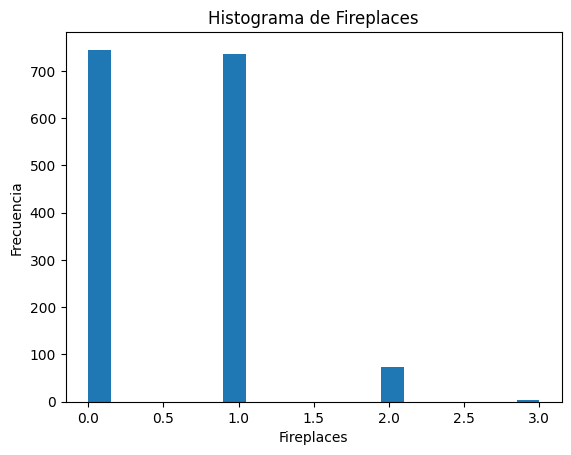

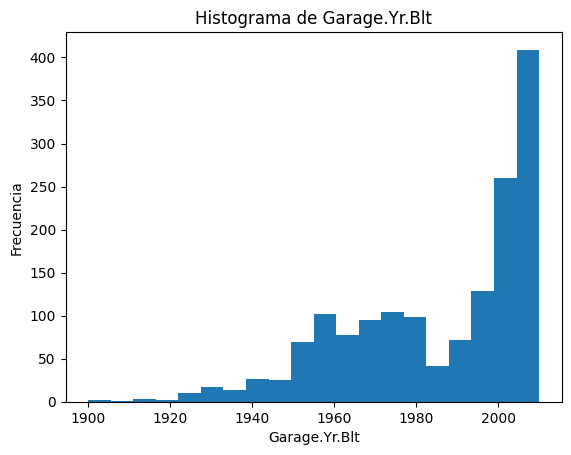

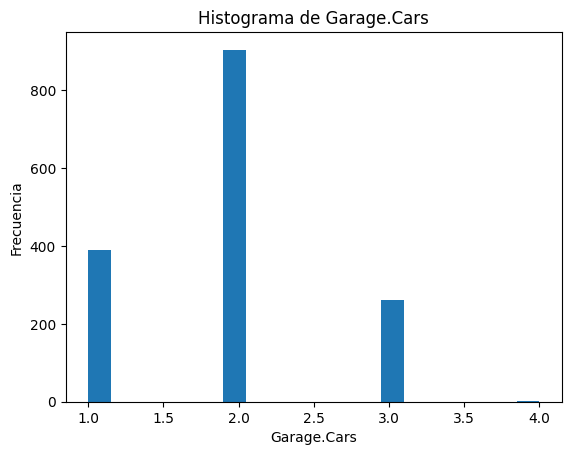

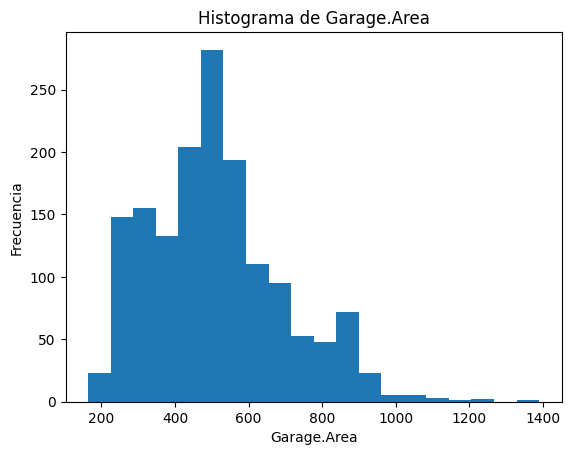

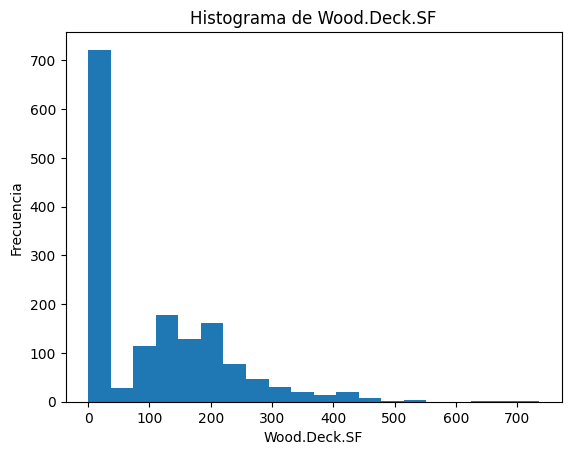

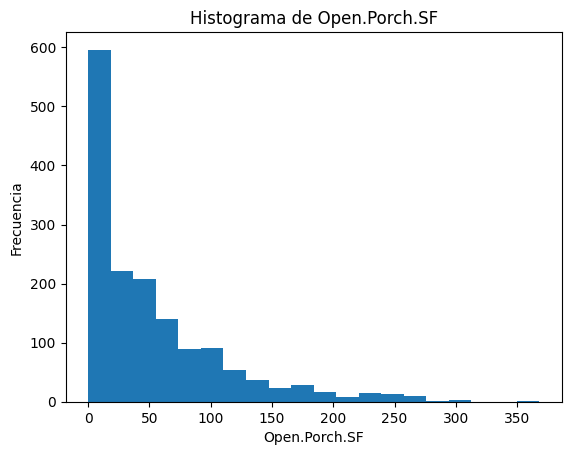

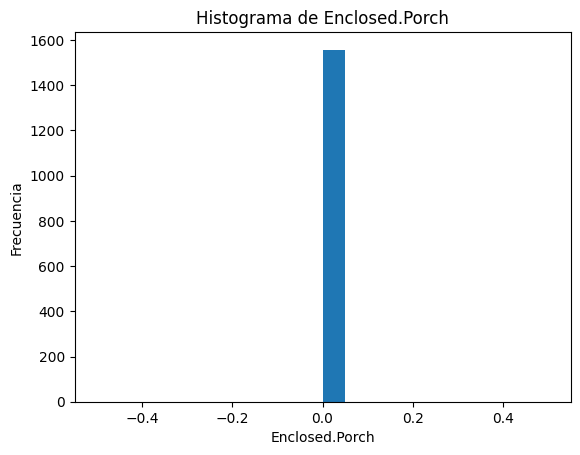

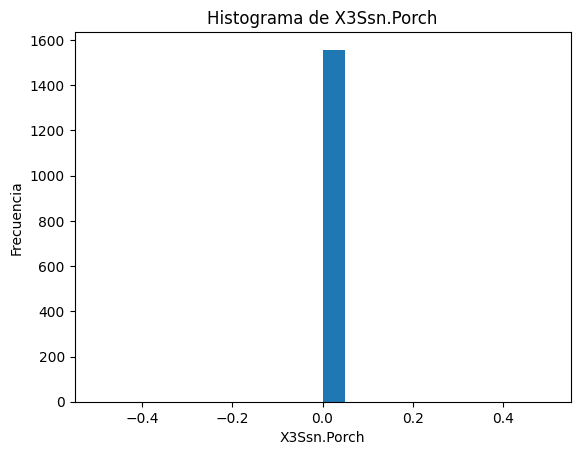

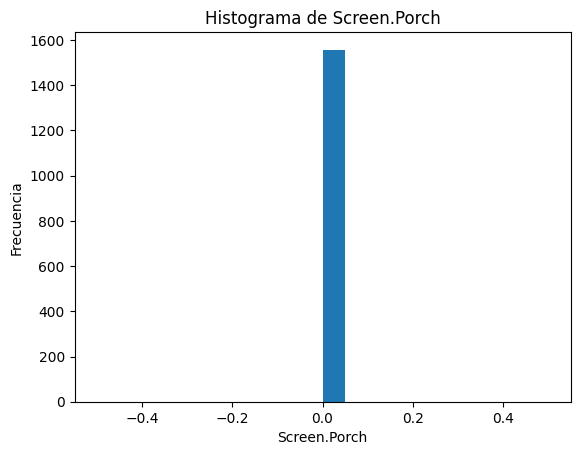

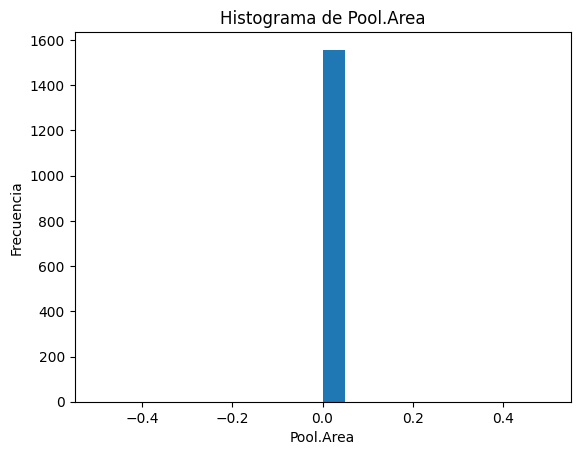

In [ ]:
#Crear un histograma por cada columna de num_col_df
import matplotlib.pyplot as plt

for column in num_cols_df:
    plt.figure()  # Crear una nueva figura en cada iteración
    plt.hist(num_cols_df[column], bins=20)
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {column}')
    plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

# Columnas numéricas para el cálculo de la media
num_col_mean = ['area', 'Lot.Area', 'Overall_Qual', 'Total.Bsmt.SF', 'X1st.Flr.SF', 'TotRms.AbvGrd', 'Garage.Area']

# Columnas numéricas para el cálculo de la mediana
num_col_median = ['Lot.Frontage', 'MS.SubClass', 'Year.Built', 'Year.Remod.Add', 'Mas.Vnr.Area', 'BsmtFin.SF.1',
                     'Bsmt.Unf.SF', 'X2nd.Flr.SF', 'Garage.Yr.Blt', 'Wood.Deck.SF', 'Open.Porch.SF',
                     'Enclosed.Porch', 'X3Ssn.Porch', 'Screen.Porch', 'Pool.Area']

# Columnas categóricas ordinales
categoricas_ordinales = ['Lot.Shape', 'Land.Slope', 'Exter_Qual', 'Exter.Cond', 'Bsmt.Qual', 'Bsmt.Exposure',
                            'BsmtFin.Type.1', 'BsmtFin.Type.2', 'Heating.QC', 'Kitchen_Qual', 'Functional',
                            'Garage.Qual', 'Paved.Drive', 'Full.Bath', 'Bsmt.Full.Bath', 'Half.Bath',
                            'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Fireplaces', 'Garage.Cars']

# Columnas categóricas nominales
categoricas_nominales = ['MS.Zoning', 'Land.Contour', 'Lot.Config', 'Neighborhood', 'Condition.1', 'Bldg.Type',
                            'House.Style', 'Roof.Style', 'Roof.Matl', 'Exterior.1st', 'Exterior.2nd', 'Heating',
                            'Electrical', 'Garage.Type', 'Sale.Condition']


numeric_pipeline_mean = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

numeric_pipeline_median = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

nominal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

column_transformer = ColumnTransformer(
    transformers=[
        ('numeric_mean', numeric_pipeline_mean, num_col_mean),
        ('numeric_median', numeric_pipeline_median, num_col_median),
        ('nominal', nominal_pipeline, categoricas_nominales),
        ('ordinal', ordinal_pipeline, categoricas_ordinales)
    ])

column_transformer

ColumnTransformer(transformers=[('numeric_mean',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['area', 'Lot.Area', 'Overall_Qual',
                                  'Total.Bsmt.SF', 'X1st.Flr.SF',
                                  'TotRms.AbvGrd', 'Garage.Area']),
                                ('numeric_median',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Lot.Frontage', 'MS.Sub...
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['Lot.Shape', 'Land.Slope', 'Exter_Qual',
                                  'Exter.Cond', 'Bsmt.Qual', 'Bsmt.Exposure',
                                  'BsmtFin.Type.1', 'BsmtFin.Type.2',
                                  'Heating.QC', 'Kitchen_Qual', 'Functional',
                                  'Garage.Qual', 'Paved.Drive', 'Full.Bath',
                                  'Bsmt.Full.Bath', 'Half.Bath',
                                  'Bedroom.AbvGr', 'Kitchen.AbvGr',
                                  'Fireplaces', 'Garage.Cars'])])

### **Paso 4.** Generar el modelo:
- Generar diferentes modelos. Utilice KNN, Regresión lineal, regresión polinomial y RandomForest
para regresión.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

pipeline_modelo_KNN = Pipeline([
    ('preprocessor', column_transformer),
    ('modelo', KNeighborsRegressor(n_neighbors=10))
])

pipeline_modelo_RL = Pipeline([
    ('preprocessor', column_transformer),
    ('modelo', LinearRegression())
])

pipeline_modelo_PF = Pipeline([
    ('preprocessor', column_transformer),
    ('polynomial_features', PolynomialFeatures(degree=2)),
    ('modelo', LinearRegression())
])

pipeline_modelo_RF = Pipeline([
    ('preprocessor', column_transformer),
    ('modelo', RandomForestRegressor(max_depth=30,n_estimators=150))
])

- Se modifican los valores del número de vecinos en KNN y la profundidad de los árboles en
RandomForest para intentar mejorar el modelo.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros que se van a probar
param_grid_knn = {
    'modelo__n_neighbors': [3, 5, 7, 10]
}

param_grid_rf = {
    'modelo__n_estimators': [50, 100, 150],
    'modelo__max_depth': [None, 10, 20, 30]
}

# Búsqueda de hiperparámetros para el modelo KNN
grid_search_knn = GridSearchCV(pipeline_modelo_KNN, param_grid=param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_train, y_train)
best_knn_model = grid_search_knn.best_estimator_
print("Mejor modelo KNN:", best_knn_model)
print("Mejores parámetros KNN:", grid_search_knn.best_params_)

# Búsqueda de hiperparámetros para el modelo RandomForest
grid_search_rf = GridSearchCV(pipeline_modelo_RF, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
print("Mejor modelo RandomForest:", best_rf_model)
print("Mejores parámetros RandomForest:", grid_search_rf.best_params_)

Mejor modelo KNN: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_mean',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['area', 'Lot.Area',
                                                   'Overall_Qual',
                                                   'Total.Bsmt.SF',
                                                   'X1st.Flr.SF',
                                                   'TotRms.AbvGrd',
                                                   'Garage.Area']),
                                                 ('numeric_median',
                                                  Pipeline(steps=[('imputer',
 

### **Paso 5.** Evaluación de desempeño:
- Evalúe cada modelo con los datos de prueba. Recuerde u4lizar el pipeline realizar las
es4maciones.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Evaluar el modelo KNN con los datos de prueba
pipeline_modelo_KNN.fit(X_train, y_train_scaled)
y_pred_knn = pipeline_modelo_KNN.predict(X_test)
mse_knn = mean_squared_error(y_test_scaled, y_pred_knn)
r2_knn = r2_score(y_test_scaled, y_pred_knn)
print("Resultados del modelo KNN:")
print(f"MSE: {mse_knn:.2f}")
print(f"R^2: {r2_knn:.2f}")

# Evaluar el modelo RandomForest con los datos de prueba
pipeline_modelo_RF.fit(X_train, y_train_scaled)
y_pred_rf = pipeline_modelo_RF.predict(X_test)
mse_rf = mean_squared_error(y_test_scaled, y_pred_rf)
r2_rf = r2_score(y_test_scaled, y_pred_rf)
print("\nResultados del modelo RandomForest:")
print(f"MSE: {mse_rf:.2f}")
print(f"R^2: {r2_rf:.2f}")

# Evaluar el modelo LinearRegression con los datos de prueba
pipeline_modelo_RL.fit(X_train, y_train_scaled)
y_pred_rl = pipeline_modelo_RL.predict(X_test)
mse_rl = mean_squared_error(y_test_scaled, y_pred_rl)
r2_rl = r2_score(y_test_scaled, y_pred_rl)
print("\nResultados del modelo LinearRegression:")
print(f"MSE: {mse_rl:.2f}")
print(f"R^2: {r2_rl:.2f}")

# Evaluar el modelo PolynomialFeatures con los datos de prueba
pipeline_modelo_PF.fit(X_train, y_train_scaled)
y_pred_pf = pipeline_modelo_PF.predict(X_test)
mse_pf = mean_squared_error(y_test_scaled, y_pred_pf)
r2_pf = r2_score(y_test_scaled, y_pred_pf)
print("\nResultados del modelo PolynomialFeatures:")
print(f"MSE: {mse_pf:.2f}")
print(f"R^2: {r2_pf:.2f}")

Resultados del modelo KNN:
MSE: 0.17
R^2: 0.85

Resultados del modelo RandomForest:
MSE: 0.12
R^2: 0.89

Resultados del modelo LinearRegression:
MSE: 1223594778426598656.00
R^2: -1106815007012160512.00

Resultados del modelo PolynomialFeatures:
MSE: 620248048496.94
R^2: -561051632655.67


- Compare los coeficientes de determinación de los datos de prueba con lo obtenidos en los datos
de entrenamiento a través de un gráfico de barras

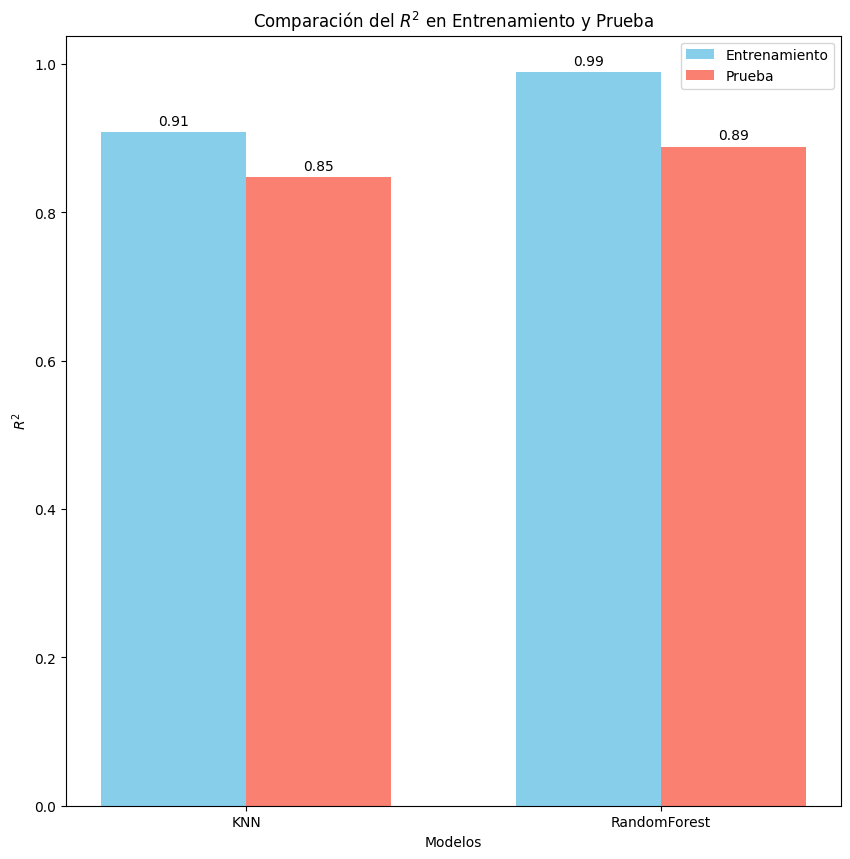

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Calcular R^2 para los datos de entrenamiento (Ejemplo)
# Asegúrate de que estas variables estén definidas en tu código.
r2_knn_train = r2_score(y_train_scaled, pipeline_modelo_KNN.predict(X_train))
r2_rf_train = r2_score(y_train_scaled, pipeline_modelo_RF.predict(X_train))
r2_knn = r2_score(y_test_scaled, pipeline_modelo_KNN.predict(X_test))  # Ejemplo para R^2 de prueba
r2_rf = r2_score(y_test_scaled, pipeline_modelo_RF.predict(X_test))

# Datos de R^2 para el gráfico de barras
modelos = ['KNN', 'RandomForest']
r2_train = [r2_knn_train, r2_rf_train]
r2_test = [r2_knn, r2_rf]

# Crear gráfico de barras con tamaño de grid aumentado
x = np.arange(len(modelos))
width = 0.35  # Ancho de las barras

fig, ax = plt.subplots(figsize=(10, 10))  # Tamaño de figura ajustado
bars1 = ax.bar(x - width/2, r2_train, width, label='Entrenamiento', color='skyblue')
bars2 = ax.bar(x + width/2, r2_test, width, label='Prueba', color='salmon')

# Etiquetas y formato
ax.set_xlabel('Modelos')
ax.set_ylabel('$R^2$')
ax.set_title('Comparación del $R^2$ en Entrenamiento y Prueba')
ax.set_xticks(x)
ax.set_xticklabels(modelos)
ax.legend()

# Mostrar el valor encima de cada barra
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.show()


- Realice el análisis de residuos para el conjunto de prueba. Compare los resultados obtenidos con
los datos de entrenamiento.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular los residuos para el conjunto de entrenamiento
residuos_knn_train = y_train_scaled - pipeline_modelo_KNN.predict(X_train)
residuos_rf_train = y_train_scaled - pipeline_modelo_RF.predict(X_train)
residuos_rl_train = y_train_scaled - pipeline_modelo_RL.predict(X_train)
residuos_pf_train = y_train_scaled - pipeline_modelo_PF.predict(X_train)

# Calcular los residuos para el conjunto de prueba
residuos_knn_test = y_test_scaled - y_pred_knn
residuos_rf_test = y_test_scaled - y_pred_rf
residuos_rl_test = y_test_scaled - y_pred_rl
residuos_pf_test = y_test_scaled - y_pred_pf

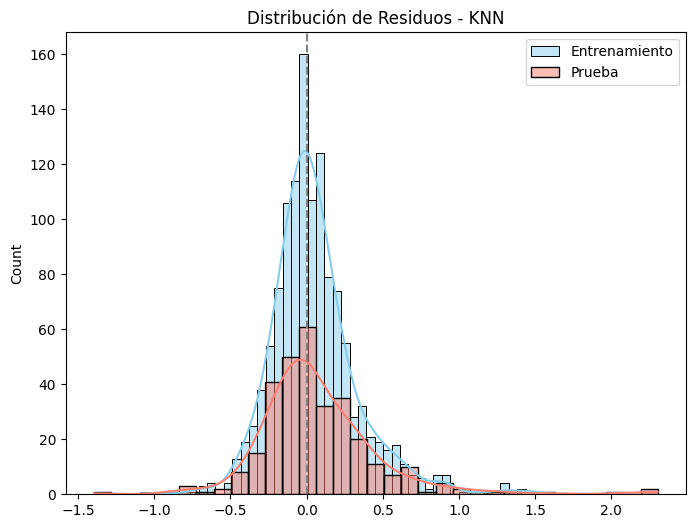

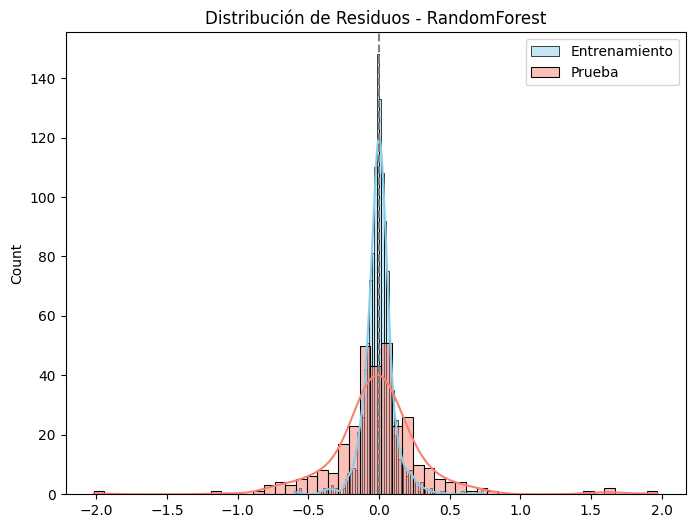

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Función para graficar histogramas de residuos
def graficar_histograma_residuos(residuos_train, residuos_test, titulo):
    plt.figure(figsize=(8, 6))
    sns.histplot(residuos_train, kde=True, color='skyblue', label='Entrenamiento')
    sns.histplot(residuos_test, kde=True, color='salmon', label='Prueba')
    plt.axvline(0, color='gray', linestyle='--')
    plt.title(f'Distribución de Residuos - {titulo}')
    plt.legend()
    plt.show()

# Crear histogramas de residuos para cada modelo
graficar_histograma_residuos(residuos_knn_train, residuos_knn_test, "KNN")
graficar_histograma_residuos(residuos_rf_train, residuos_rf_test, "RandomForest")
#graficar_histograma_residuos(residuos_rl_train, residuos_rl_test, "LinearRegression")
#graficar_histograma_residuos(residuos_pf_train, residuos_pf_test, "PolynomialFeatures")

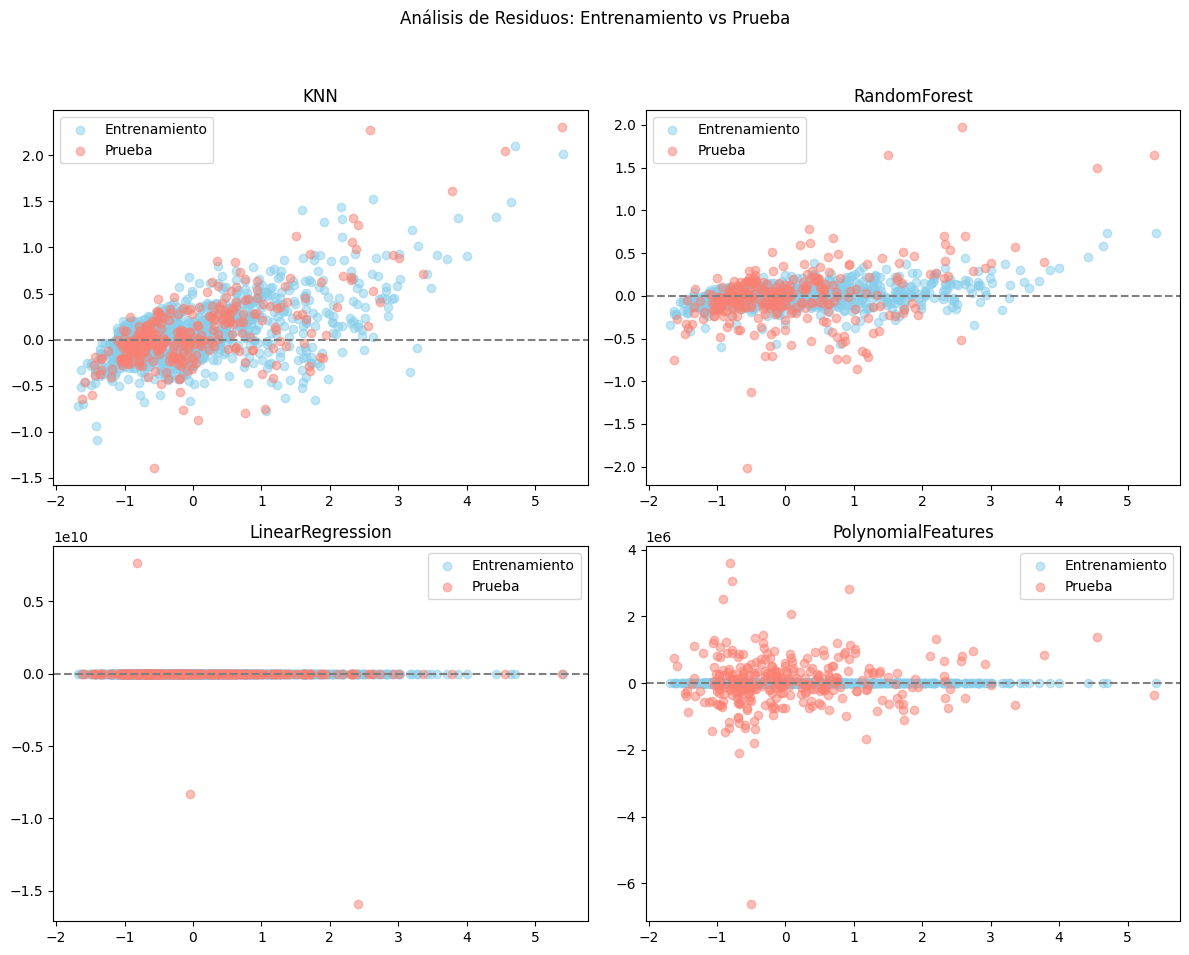

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Análisis de Residuos: Entrenamiento vs Prueba')

# Gráficos para KNN
axs[0, 0].scatter(y_train_scaled, residuos_knn_train, alpha=0.5, label='Entrenamiento', color='skyblue')
axs[0, 0].scatter(y_test_scaled, residuos_knn_test, alpha=0.5, label='Prueba', color='salmon')
axs[0, 0].axhline(0, color='gray', linestyle='--')
axs[0, 0].set_title('KNN')
axs[0, 0].legend()

# Gráficos para RandomForest
axs[0, 1].scatter(y_train_scaled, residuos_rf_train, alpha=0.5, label='Entrenamiento', color='skyblue')
axs[0, 1].scatter(y_test_scaled, residuos_rf_test, alpha=0.5, label='Prueba', color='salmon')
axs[0, 1].axhline(0, color='gray', linestyle='--')
axs[0, 1].set_title('RandomForest')
axs[0, 1].legend()

# Gráficos para LinearRegression
axs[1, 0].scatter(y_train_scaled, residuos_rl_train, alpha=0.5, label='Entrenamiento', color='skyblue')
axs[1, 0].scatter(y_test_scaled, residuos_rl_test, alpha=0.5, label='Prueba', color='salmon')
axs[1, 0].axhline(0, color='gray', linestyle='--')
axs[1, 0].set_title('LinearRegression')
axs[1, 0].legend()

# Gráficos para PolynomialFeatures
axs[1, 1].scatter(y_train_scaled, residuos_pf_train, alpha=0.5, label='Entrenamiento', color='skyblue')
axs[1, 1].scatter(y_test_scaled, residuos_pf_test, alpha=0.5, label='Prueba', color='salmon')
axs[1, 1].axhline(0, color='gray', linestyle='--')
axs[1, 1].set_title('PolynomialFeatures')
axs[1, 1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

-  Calcule las siguientes métricas: MAE, MSE y RMSE. ¿Cuál sería la más adecuada para este
problema?

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Función para calcular métricas y mostrar resultados
def calcular_metricas(y_true, y_pred, modelo):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"Métricas para {modelo}:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}\n")
    return mae, mse, rmse

# Cálculo de métricas para cada modelo
mae_knn, mse_knn, rmse_knn = calcular_metricas(y_test_scaled, y_pred_knn, "KNN")
mae_rf, mse_rf, rmse_rf = calcular_metricas(y_test_scaled, y_pred_rf, "RandomForest")
mae_rl, mse_rl, rmse_rl = calcular_metricas(y_test_scaled, y_pred_rl, "LinearRegression")
mae_pf, mse_pf, rmse_pf = calcular_metricas(y_test_scaled, y_pred_pf, "PolynomialFeatures")


Métricas para KNN:
MAE: 0.26
MSE: 0.17
RMSE: 0.41

Métricas para RandomForest:
MAE: 0.22
MSE: 0.12
RMSE: 0.35

Métricas para LinearRegression:
MAE: 102234110.50
MSE: 1223594778426598656.00
RMSE: 1106162184.50

Métricas para PolynomialFeatures:
MAE: 514018.62
MSE: 620248048496.94
RMSE: 787558.28



**¿Para que sirve cada tipo de error?**

MAE (Mean Absolute Error) mide el error promedio sin elevarlo al cuadrado, lo que facilita la interpretación. Es útil si se quiere conocer la magnitud promedio de los errores en las mismas unidades que los datos originales.

MSE (Mean Squared Error) da más peso a los errores grandes debido a la elevación al cuadrado, penalizando más los errores extremos. Puede ser útil si es crucial evitar errores grandes.

RMSE (Root Mean Squared Error) es la raíz cuadrada del MSE, regresando a las unidades originales y siendo sensible a los errores grandes como el MSE, pero más fácil de interpretar.

**Eleccion:**

Como el problema no requiere efoncarse en tratar lo errores grandes (por ejemplo, en predicciones que afectan decisiones críticas), el RMSE o el MSE no son buenas opciones. Como los valores atípicos son frecuentes y “normales” en el dataset, estas métricas pueden sesgarse y no reflejar fielmente el desempeño del modelo en la mayoría de los datos.

Por otro lado, como se prefiere una medida general del error sin tener exagerar los valores atípicos, el MAE es la mejor elección. Ademas mide la magnitud promedio de los errores sin elevarlos al cuadrado, por lo que no exagera el impacto de los valores atípicos. Esto evita que los outliers distorsionen la evaluación general de la precisión del modelo.

### **Paso 6.** Selección del modelo:
- Se selecciona el modelo que ofrece una mejor solución.

El mejor modelo es Random Forest, esto se puede ver por su buen rendimiento y las distintas estadisticas que se han estado analizando a lo largo del trabajo. Los dos modelos de RF y KNN fueron los que ofrecieron los mejores resultados, sin embargo por la decision de la utilizacion de del MAE como metrica a tener en cuenta, el RF tiene un mejor desempeño.

Tambien podemos ver los aspectos de las graficas de residuos lo cual implica que es mejor la del RF al tener un aspecto mas parecido a una distribucion normal, esto indica que el modelo no presenta un sesgo significativo en sus predicciones, ya que los errores están distribuidos de manera simétrica alrededor de cero.

La mayoría de los residuos están cerca de 0, lo que sugiere que el modelo tiene una precisión alta, ya que los errores tienden a ser pequeños. Si los residuos estuvieran muy alejados de 0, significaría que el modelo comete errores más grandes.

Los residuos del conjunto de entrenamiento (en azul) son ligeramente más ajustados alrededor de 0 que los del conjunto de prueba (en rojo). Esto es esperado, ya que el modelo generalmente se ajusta mejor al conjunto de entrenamiento. Si la diferencia entre ambos conjuntos fuera mucho mayor, podría indicar sobreajuste.

Hay pocos residuos extremos (lejos de 0), lo cual es ideal porque sugiere que el modelo no está cometiendo errores significativos en la mayoría de las predicciones.

Por ultimo Random Forest puede ser considerado el mejor modelo en términos de precisión en este caso específico, dado que su R2 en prueba es el más alto.

-  ¿Considera que los datos proporcionados por la empresa son suficientes? ¿Son los adecuados?

Se presentan algunas sugerencias para mejorar el estado actual del modelo.

Los datos que se proporcionaron para el ejercicio en su mayoria estaban compuestos por outliers y predictores que tienen comportamientos que no siguen distribuciones normales, esto lo podemos ver cuando imputamos los datos, puesto que, hay mas predictores numericos que fueron imputados con la mediana que con la media.

Esto acorto los datos que realmente se podian utilizar para tener un control sobre los posibles resultados de los modelos, al tener tantos predictores esto puede significar un cambio perjudicial.

Aunque se puede decir que los datos proporcionados al inicio fueron suficientes, despues de la limpieza no lo fueron. Tambien es importante solo tenerlos predictores importantes y para poder definir cuales son los mas escenciales es necesrio buscar relaciones tanto lineales como no lineales. Esto puede llevar a una mayor complejidad a la hora de hacer el analisis de las relaciones.

-  En un párrafo, se escribe su recomendación para la empresa.

Recomendamos a la empresa utilizar el modelo de Random Forest para predecir los precios de las viviendas, ya que ha demostrado ser el más preciso. Este modelo ofrece buenos resultados sin que los errores se vean afectados por valores muy extremos o inusuales en los datos, lo que es ideal para obtener una estimación confiable. Observamos que los errores (diferencias entre los precios reales y los precios predichos) se distribuyen de manera equilibrada alrededor de cero, lo que indica que el modelo no tiene un sesgo hacia predicciones altas o bajas. Aunque el conjunto de datos original incluía valores atípicos y muchas variables, después de limpiarlo y seleccionar las variables más relevantes, los datos son más útiles para obtener resultados consistentes. Para mejorar aún más las predicciones, sugerimos analizar las relaciones importantes entre las variables que afectan los precios de las viviendas, lo cual simplificaría el modelo y aumentaría su precisión.